## 5.2 Load Augmented Images to Tensorflow Dataset

In [2]:
import albumentations as alb
import os
import time
import cv2
import json  
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Now we are gonna write a function that will load the images
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [4]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [5]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [6]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [7]:
train_images.as_numpy_iterator().next()

array([[[4.0153188e-01, 4.3376225e-01, 4.6274510e-01],
        [4.0147060e-01, 4.3676472e-01, 4.6066177e-01],
        [3.9871323e-01, 4.3400735e-01, 4.5361519e-01],
        ...,
        [4.0784314e-01, 4.4705883e-01, 4.4313726e-01],
        [4.0784314e-01, 4.4705883e-01, 4.4313726e-01],
        [4.0784314e-01, 4.4705883e-01, 4.4313726e-01]],

       [[4.0000001e-01, 4.3529412e-01, 4.5919117e-01],
        [4.0000001e-01, 4.3529412e-01, 4.5490196e-01],
        [3.9656863e-01, 4.3186274e-01, 4.5147058e-01],
        ...,
        [4.0392157e-01, 4.5098040e-01, 4.4313726e-01],
        [4.0392157e-01, 4.5098040e-01, 4.4313726e-01],
        [4.0637255e-01, 4.4852942e-01, 4.4313726e-01]],

       [[4.0392157e-01, 4.3921569e-01, 4.5882353e-01],
        [4.0392157e-01, 4.3921569e-01, 4.5882353e-01],
        [3.9950982e-01, 4.3480393e-01, 4.5441177e-01],
        ...,
        [4.0343139e-01, 4.5049021e-01, 4.4264707e-01],
        [4.0343139e-01, 4.5049021e-01, 4.4264707e-01],
        [4.0588236e-01

# 6. Prepare Labels

## 6.1 Build Label Loading Function

In [8]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

## 6.2 Load Labels to Tensorflow Dataset

In [9]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [10]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [11]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [12]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2678, 0.1251, 0.681 , 0.6553], dtype=float16))

# 7. Combine Label and Image Samples

## 7.1 Check Partition Lengths

In [13]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3720, 3720, 840, 840, 840, 840)

## 7.2 Create Final Datasets (Images/Labels)

In [14]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [15]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [16]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [17]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0]], dtype=uint8),
 array([[0.9243, 0.1533, 1.    , 0.9023],
        [0.7554, 0.1287, 1.    , 0.878 ],
        [0.    , 0.0645, 0.4097, 0.752 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.977 , 0.315 , 1.    , 0.7417],
        [0.    , 0.1912, 0.1527, 0.643 ],
        [0.    , 0.3943, 0.2886, 0.841 ],
        [0.    , 0.    , 0.    , 0.    ]], dtype=float16))

## 7.3 View Images and Annotations

In [18]:
data_samples = train.as_numpy_iterator()

In [19]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


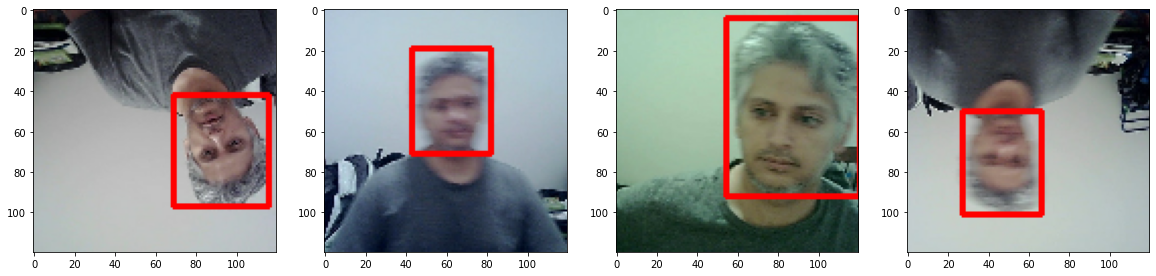

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# 8. Build Deep Learning using the Functional API

## 8.1 Import Layers and Base Network

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

## 8.2 Download VGG16

In [22]:
vgg = VGG16(include_top=False)

In [23]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

## 8.3 Build instance of Network

In [24]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

## 8.4 Test out Neural Network

In [25]:
facetracker = build_model()

In [26]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 120, 120, 3) 0                                            
__________________________________________________________________________________________________
vgg16 (Functional)              (None, None, None, 5 14714688    input_2[0][0]                    
__________________________________________________________________________________________________
global_max_pooling2d (GlobalMax (None, 512)          0           vgg16[0][0]                      
__________________________________________________________________________________________________
global_max_pooling2d_1 (GlobalM (None, 512)          0           vgg16[0][0]                      
______________________________________________________________________________________________

In [27]:
X, y = train.as_numpy_iterator().next()

In [28]:
X.shape

(8, 120, 120, 3)

In [29]:
classes, coords = facetracker.predict(X)

In [30]:
classes, coords

(array([[0.33140233],
        [0.42957243],
        [0.46326756],
        [0.44069043],
        [0.37934402],
        [0.34744734],
        [0.41045317],
        [0.36685085]], dtype=float32),
 array([[0.5326023 , 0.7314363 , 0.6262448 , 0.526885  ],
        [0.60720074, 0.77317464, 0.72175455, 0.4970407 ],
        [0.6369525 , 0.53401345, 0.69517183, 0.6167254 ],
        [0.58734554, 0.6841337 , 0.73408103, 0.52850217],
        [0.63833064, 0.7002103 , 0.6923638 , 0.48767555],
        [0.5261008 , 0.6545625 , 0.71105826, 0.54702103],
        [0.5871502 , 0.68011177, 0.700133  , 0.5899128 ],
        [0.5880851 , 0.6949324 , 0.6967454 , 0.4868403 ]], dtype=float32))

# 9. Define Losses and Optimizers

## 9.1 Define Optimizer and LR

In [31]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [32]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

## 9.2 Create Localization Loss and Classification Loss

In [33]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [34]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

## 9.3 Test out Loss Metrics

In [35]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.603571>

In [36]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9322494>

In [37]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.603571>

# 10. Train Neural Network

## 10.1 Create Custom Model Class

In [38]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [39]:
model = FaceTracker(facetracker)

In [40]:
model.compile(opt, classloss, regressloss)

## 10.2 Train

In [41]:
logdir='logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
465/465 [==============================] - 933s 2s/step - total_loss: 0.3628 - class_loss: 0.0885 - regress_loss: 0.3185 - val_total_loss: 0.0934 - val_class_loss: 0.0245 - val_regress_loss: 0.0812
Epoch 2/10
465/465 [==============================] - 934s 2s/step - total_loss: 0.0941 - class_loss: 0.0252 - regress_loss: 0.0815 - val_total_loss: 0.0440 - val_class_loss: 0.0062 - val_regress_loss: 0.0409
Epoch 3/10
465/465 [==============================] - 924s 2s/step - total_loss: 0.0658 - class_loss: 0.0203 - regress_loss: 0.0557 - val_total_loss: 0.0346 - val_class_loss: 0.0089 - val_regress_loss: 0.0301
Epoch 4/10
465/465 [==============================] - 928s 2s/step - total_loss: 0.0525 - class_loss: 0.0147 - regress_loss: 0.0452 - val_total_loss: 0.1160 - val_class_loss: 0.0449 - val_regress_loss: 0.0935
Epoch 5/10
465/465 [==============================] - 916s 2s/step - total_loss: 0.0400 - class_loss: 0.0122 - regress_loss: 0.0339 - val_total_loss: 0.0519 - val_c

## 10.3 Plot Performance

In [44]:
hist.history

{'total_loss': [0.022959008812904358,
  0.05890967696905136,
  0.010690934956073761,
  0.01962500624358654,
  0.004107987973839045,
  0.021903056651353836,
  0.0038538069929927588,
  0.004682628903537989,
  0.0178869366645813,
  0.004046195652335882],
 'class_loss': [0.002039395272731781,
  0.021574024111032486,
  8.901540422812104e-05,
  0.00014350074343383312,
  0.0010068550473079085,
  2.7493924790178426e-05,
  1.4007395293447189e-05,
  1.0281813729307032e-06,
  0.00013451151608023793,
  2.7292127924738452e-05],
 'regress_loss': [0.021939311176538467,
  0.04812266677618027,
  0.010646427050232887,
  0.019553255289793015,
  0.003604560624808073,
  0.02188931033015251,
  0.0038468032144010067,
  0.004682114813476801,
  0.017819680273532867,
  0.004032549448311329],
 'val_total_loss': [0.09341791272163391,
  0.04404047876596451,
  0.03457041457295418,
  0.1159760057926178,
  0.051851145923137665,
  0.05903419479727745,
  0.03117949515581131,
  0.045370347797870636,
  0.0134326415136456

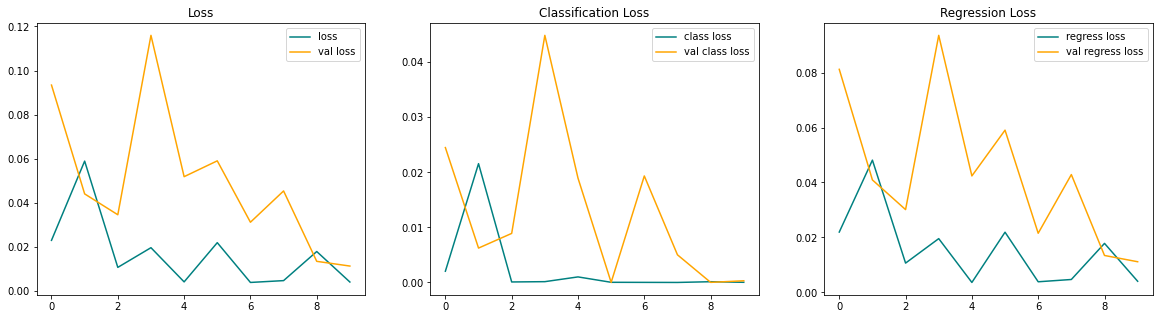

In [45]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

## 11.1 Make Predictions on Test Set

In [64]:
test_data = test.as_numpy_iterator()

In [65]:
test_sample = test_data.next()

In [66]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 681ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


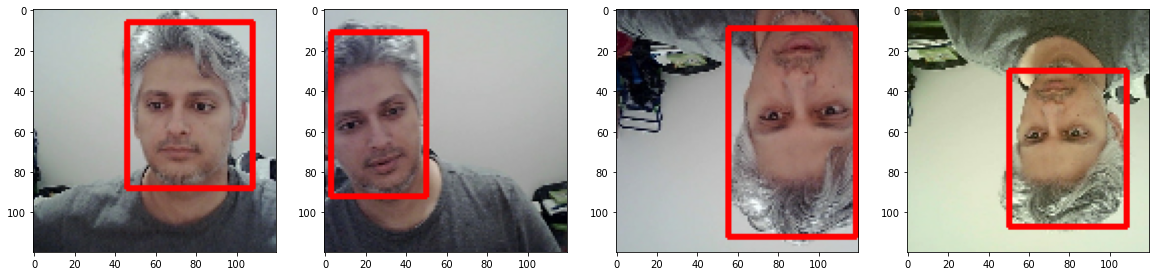

In [67]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

## 11.2 Save the Model

In [46]:
from tensorflow.keras.models import load_model

In [47]:
facetracker.save('facetracker.h5')

In [7]:
facetracker = load_model('facetracker.h5')


## 11.3 Real Time Detection

In [11]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 121ms/step
